# Plant Seedlings Classification


## 1. Setup



In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

# PATH = os.path.join('data', 'sample') + '/'
PATH = os.path.join('data') + '/'

## 2. Creating the model

### 2.0 - initializing model

These are things we want to run before each section, so each time we start with a new network.

In [2]:
size = 128

In [3]:
arch=resnet34

In [4]:
tfms = tfms_from_model(resnet34, size, aug_tfms=transforms_top_down, max_zoom=1.1)

In [5]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms, test_name='test')
learn = ConvLearner.pretrained(arch, data, precompute=False)

In [14]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 93%|█████████▎| 56/60 [00:07<00:00,  7.02it/s, loss=19.6]


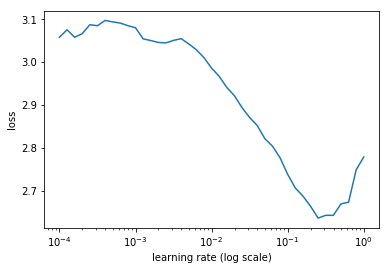

In [15]:
learn.sched.plot()

The learning rate I decide to use is 2e-2

### 2.1 Method 1 - simple fit

In [16]:
learn.fit(2e-2, 20)

HBox(children=(IntProgress(value=0, description='Epoch', max=20), HTML(value='')))

[0.      1.94513 1.49078 0.50298]                         
[1.      1.69118 1.39658 0.52619]                         
[2.      1.54342 1.3265  0.54518]                         
[3.      1.46399 1.30617 0.53662]                         
[4.      1.42994 1.26385 0.56083]                         
[5.      1.38714 1.26552 0.57567]                         
[6.      1.37826 1.26941 0.56317]                         
[7.      1.33385 1.26592 0.55976]                         
[8.      1.30778 1.20497 0.57098]                         
[9.      1.26936 1.22835 0.57778]                         
[10.       1.23728  1.21363  0.5702 ]                     
[11.       1.23117  1.22318  0.57098]                     
[12.       1.21573  1.19862  0.5827 ]                     
[13.       1.23605  1.1699   0.59418]                     
[14.       1.21626  1.18831  0.57645]                     
[15.       1.21147  1.17754  0.60278]                     
[16.       1.19261  1.16635  0.60799]                   

In [17]:
learn.save('simple_20_epochs')

In [18]:
learn.fit(2e-2, 10)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

[0.      1.10917 1.11944 0.60484]                         
[1.      1.11686 1.11267 0.62439]                         
[2.      1.13411 1.10696 0.62177]                         
[3.      1.10852 1.11126 0.60302]                         
[4.      1.13442 1.11315 0.61448]                         
[5.      1.11926 1.12346 0.6137 ]                         
[6.      1.09909 1.13664 0.60249]                         
[7.      1.10201 1.09744 0.62594]                         
[8.      1.10868 1.11034 0.61579]                         
[9.      1.09576 1.10866 0.61397]                         



In [19]:
learn.save('simple_30_epochs')

As we can see, the learning slowed down about 20th iteration.
The training loss (2nd column) stays pretty much the same, same as while validation loss (3rd column) and validation accuracy (4th column).

Adding more epochs doesn't seem to improve the results much, so we will try different methods.

### 2.2 Method 2 - cycles

In [34]:
learn.fit(2e-2, 5, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[0.      1.7813  1.34299 0.56032]                         
[1.      1.50003 1.06753 0.64679]                         
[2.      1.28028 1.02307 0.66424]                         
[3.      1.25097 0.96723 0.66166]                         
[4.      1.16013 0.90938 0.68822]                         
[5.      1.08207 0.85288 0.71191]                         
[6.      1.04017 0.84071 0.70357]                         
[7.      1.03879 0.87107 0.69967]                         
[8.      1.0399  0.82456 0.71844]                         
[9.      1.00741 0.77837 0.73795]                         
[10.       0.98066  0.7619   0.73797]                      
[11.       0.9603   0.73374  0.75333]                      
[12.       0.94377  0.7282   0.7575 ]                      
[13.       0.91235  0.71887  0.76895]                      
[14.       0.88362  0.72467  0.76922]                      
[15.       0.92798  0.7657   0.74839]                      
[16.       0.96951  0.77429  0.73094]             

This result gave much better result with the similar number of epochs.

In [35]:
learn.save('cycles_512')

### 2.3.1 Method 3 - finetuning

In [6]:
learn.unfreeze()

In [7]:
learning_rate_base = 2e-2
lr=np.array([learning_rate_base/9,learning_rate_base/3,learning_rate_base])

In [8]:
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

[0.      1.15004 0.62685 0.78926]                         
[1.      0.61557 0.39989 0.85825]                          
[2.      0.39159 0.31553 0.88538]                          
[3.      0.35809 0.4463  0.851  ]                          
[4.      0.29195 0.27541 0.90308]                          
[5.      0.21587 0.2354  0.91507]                          
[6.      0.1806  0.23286 0.91897]                          
[7.      0.21102 0.61848 0.82418]                          
[8.      0.20809 0.34462 0.88797]                          
[9.      0.18368 0.49826 0.84761]                          
[10.       0.16004  0.24655  0.91481]                      
[11.       0.12128  0.23284  0.92185]                      
[12.       0.0992   0.23761  0.92445]                       
[13.       0.08569  0.22695  0.92653]                       
[14.       0.0831   0.2258   0.92915]                       



In [9]:
learn.save('finetuning_412_div_3')

These results seem impressive - 93% accuracy on the validation set.

However, we may have experienced some overfitting - training loss dropped 2 times, while validation stayed pretty much te same.

Now we will try using different divisor for the finetuning

### 2.3.2 Method 3 - finetuning

In [12]:
learn.unfreeze()

In [13]:
learning_rate_base = 2e-2
lr=np.array([learning_rate_base/4,learning_rate_base/2,learning_rate_base])

In [14]:
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

[0.      1.10276 0.62678 0.80929]                         
[1.      0.67279 0.4174  0.85776]                          
[2.      0.43191 0.29587 0.90805]                          
[3.      0.36992 0.41441 0.85882]                          
[4.      0.29061 0.56825 0.8182 ]                          
[5.      0.22028 0.23222 0.92316]                          
[6.      0.18789 0.2331  0.91665]                          
[7.      0.22387 0.79643 0.74058]                          
[8.      0.22193 0.69442 0.78407]                          
[9.      0.2053  0.27727 0.89344]                          
[10.       0.1546   0.21451  0.919  ]                      
[11.       0.1268   0.19712  0.92837]                      
[12.       0.1091   0.21471  0.92576]                      
[13.       0.09225  0.176    0.94191]                       
[14.       0.08424  0.18502  0.93436]                       



In [15]:
learn.save('finetuning_412_div_2')

The results are similar, maybe signs of overfitting are not as visible as the last time, but it may be just randomness.

### 2.4 Method 4 - finetuning trained network

This time we will take network learned in point 2.2 as a starting point.

In [6]:
learn.load('cycles_512')

In [7]:
learn.unfreeze()

In [8]:
learning_rate_base = 2e-2
lr=np.array([learning_rate_base/4,learning_rate_base/2,learning_rate_base])

In [9]:
learn.fit(lr, 5, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[0.      0.6739  0.40152 0.85647]                          
[1.      0.44474 0.35002 0.8807 ]                          
[2.      0.3176  0.24055 0.91352]                          
[3.      0.29737 0.37791 0.8596 ]                          
[4.      0.24475 0.28709 0.89477]                          
[5.      0.19164 0.26321 0.91352]                          
[6.      0.15099 0.21861 0.92316]                          
[7.      0.17997 0.39232 0.88174]                          
[8.      0.17949 0.26756 0.90962]                          
[9.      0.16762 0.28022 0.90441]                          
[10.       0.13182  0.27413  0.90962]                      
[11.       0.10687  0.2316   0.92941]                      
[12.       0.089    0.18182  0.93254]                       
[13.       0.07936  0.19323  0.93697]                       
[14.       0.06889  0.1861   0.94009]                       
[15.       0.11499  0.31199  0.91117]                       
[16.       0.14549  0.26899  0.91326

The results are similar, which was predictable - finetuning alone gives us so much boost that changing the starting point doesn't really improves much.

In [10]:
learn.save('finetuning_412_div_2_from_cycles')

## 3. Analysing the results

In [8]:
learn.load('finetuning_412_div_2_from_cycles')

In [11]:
log_preds,y = learn.TTA()
preds = np.argmax(log_preds, axis=1)
probs = np.mean(np.exp(log_preds), axis=0)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)



[[ 40   0   0   0   0   0  12   0   0   0   0   0]
 [  0  78   0   0   0   0   0   0   0   0   0   0]
 [  0   0  56   1   0   0   0   0   0   0   0   0]
 [  0   0   0 122   0   0   0   0   0   0   0   0]
 [  2   0   0   0  42   0   0   0   0   0   0   0]
 [  0   0   0   0   0  94   1   0   0   0   0   0]
 [  6   0   0   0   0   0 124   0   0   0   0   0]
 [  0   0   0   0   0   0   0  44   0   0   0   0]
 [  0   0   0   0   0   0   2   0 101   0   0   0]
 [  0   0   0   0   0   0   0   0   2  44   0   0]
 [  0   0   0   0   0   0   0   0   0   0  99   0]
 [  0   1   0   0   0   0   0   0   2   0   0  74]]


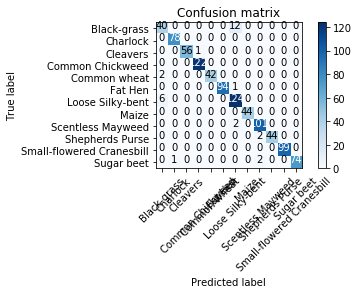

In [12]:
plot_confusion_matrix(cm, data.classes)

As we can see from the confusion matrix, the majority of errors come from mistaking classes 0 and 6 - Black grass and Loose Silky-bent.

To help the network to distinguish them better, it may be helpful to look into the data.

In [11]:
visualization_size = 4

In [12]:
log_preds = learn.predict()
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.amax(np.exp(log_preds),axis=1)

In [13]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], visualization_size, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH + ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds, x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In [14]:
incorrect_ids = np.where((preds == data.val_y)==False)[0]

In [15]:
predictions = [preds[x] for x in incorrect_ids]

In [16]:
labels = [data.val_y[x] for x in incorrect_ids]

In [17]:
imgs = [load_img_id(data.val_ds, x) for x in incorrect_ids]

Predicted: Loose Silky-bent Real: Black-grass


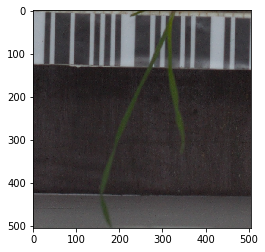

In [33]:
current_id = 0
plt.imshow(imgs[current_id])
print("Predicted:", data.classes[predictions[current_id]], "Real:", data.classes[labels[current_id]])

## 4. Conclusion

In [13]:
test_log_predictions, _ = learn.TTA(is_test=True)
test_predictions = np.argmax(test_log_predictions, axis=1)
test_predictions_classes = [data.classes[pred] for pred in test_predictions]
test_file_names = learn.data.test_ds.fnames

with open('submission_2.csv', 'w') as the_file:
    the_file.write('file,species\n')
    for file_path, prediction in zip(test_file_names, test_predictions_classes):
        file_name = file_path.split('/')[-1]
        the_file.write(file_name)
        the_file.write(",")
        the_file.write(prediction)
        the_file.write("\n")
the_file.close()

from IPython.display import FileLink
FileLink('submission_2.csv')


/home/paperspace/kaggle_plant_seedlings/submission_2.csv

For now I will finish this experiment.
Ther results are pretty good, most of the mistakes are done due to confusing two classes, which I can't distinguish with my naked eye anyway.

After submitting this results to the competition I scored 0.95969 on the testing set, which placed me on the 209th position on the leaderboard, which at the moment of writing is top 40%.
Getting to this position took me about 6 hours of coding.

UPDATE:
I've re ran this experiment this time with 5 epochs instead of 4.
The results are much better: 
[30.       0.02685  0.17394  0.9453 ]                       
This scored 0.97355 on the Kaggle competition, which gave me 158th position (out of 581).